In [1]:
# Import libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

/home/tek2991/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Import data from excel files
df1 = pd.read_excel('Formative Assessment-3_class_VII.xlsx');
df2 = pd.read_excel('Formative Assessment -4_class_VII.xlsx');
df3 = pd.read_excel('Annual Exam-2023_class_VII.xlsx');

# In df3, where the Full Mark is not 100, multuply the Full Mark, Pass Mark and Marks Secured by 100/Full Mark
df3.loc[df3['Full Mark']!=100, 'Pass Mark'] = df3['Pass Mark']*100/df3['Full Mark'];
df3.loc[df3['Full Mark']!=100, 'Marks Secured'] = df3['Marks Secured']*100/df3['Full Mark'];
df3.loc[df3['Full Mark']!=100, 'Full Mark'] = df3['Full Mark']*100/df3['Full Mark'];

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True);

# print the head
df.head()

,Academic session,Exam Name,Exam Mode,Subject Name,Subject Status,Full Mark,Pass Mark,Negative Percentage,Student Name,Class,Section,Roll No,Marks Secured,Result
0,2022-2023,Formative Assessment-3,Offline,English I,Evaluating,25.0,7.0,0 %,Anuska Hazarika,VII,A,1,3.0,Fail
1,2022-2023,Formative Assessment-3,Offline,Assamese,Evaluating,25.0,7.0,0 %,Anuska Hazarika,VII,A,1,8.5,Pass
2,2022-2023,Formative Assessment-3,Offline,Computer,Evaluating,25.0,7.0,0 %,Anuska Hazarika,VII,A,1,9.5,Pass
3,2022-2023,Formative Assessment-3,Offline,English II,Evaluating,25.0,7.0,0 %,Anuska Hazarika,VII,A,1,4.5,Fail
4,2022-2023,Formative Assessment-3,Offline,Maths,Evaluating,25.0,7.0,0 %,Anuska Hazarika,VII,A,1,9.0,Pass


In [3]:
# Print the number of cells with value 0 in marks secured column
print('Number of cells with value 0 in marks secured column: ', df[df['Marks Secured']==0].shape[0])

# Print the student names with value 0 in marks secured column
print('Student names with value 0 in marks secured column: ', df[df['Marks Secured']==0]['Student Name'].unique())

Number of cells with value 0 in marks secured column:  11
Student names with value 0 in marks secured column:  ['Nakul Sha' 'Anuska Hazarika' 'Jeet Boro' 'Anurag Sharma' 'Somar Barman'
 'Sandeep Chetry' 'Rohan Sharma' 'Bikrant Shah']


In [4]:
# Get all the Subject names
subjects = df['Subject Name'].unique();

# Get all the students
students = df['Student Name'].unique();

# Get all the Exam names
exams = df['Exam Name'].unique();

In [5]:
# print the number of subjects
print('Number of Subjects: ', len(subjects));
# Print the subjects
print('Subjects: ', subjects);
# print the number of students
print('Number of Students: ', len(students));

# print the number of exams
print('Number of Exams: ', len(exams));

Number of Subjects:  8
Subjects:  ['English I' 'Assamese' 'Computer' 'English II' 'Maths' 'Science' 'Hindi'
 'Social Science']
Number of Students:  8
Number of Exams:  3


In [6]:
# Create a new dataframe for students data
df_new = pd.DataFrame(students, columns=['Student Name']);

# Loop through all the students
for student in students:
    # Find the first row of the student in the dataframe
    row = df.loc[df['Student Name'] == student].iloc[0];
    # Add the Class, Section, Roll No to the new dataframe
    df_new.loc[df_new['Student Name'] == student, 'Class'] = row['Class'];
    df_new.loc[df_new['Student Name'] == student, 'Section'] = row['Section'];
    df_new.loc[df_new['Student Name'] == student, 'Roll No'] = row['Roll No'];

df_new.head()

,Student Name,Class,Section,Roll No
0,Anuska Hazarika,VII,A,1.0
1,Jeet Boro,VII,A,2.0
2,Anurag Sharma,VII,A,3.0
3,Somar Barman,VII,A,4.0
4,Sandeep Chetry,VII,A,5.0


In [7]:
# Add columns for each exam and subject
for exam in exams:
    for subject in subjects:
        df_new[exam + '_' + subject] = 0;
        df_new[exam + '_' + subject + '_total'] = 0;
        df_new[exam + '_' + subject + '_pass'] = 0;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment-3_English I,Formative Assessment-3_English I_total,Formative Assessment-3_English I_pass,Formative Assessment-3_Assamese,Formative Assessment-3_Assamese_total,Formative Assessment-3_Assamese_pass,...,Annual Exam-2023_Maths_pass,Annual Exam-2023_Science,Annual Exam-2023_Science_total,Annual Exam-2023_Science_pass,Annual Exam-2023_Hindi,Annual Exam-2023_Hindi_total,Annual Exam-2023_Hindi_pass,Annual Exam-2023_Social Science,Annual Exam-2023_Social Science_total,Annual Exam-2023_Social Science_pass
0,Anuska Hazarika,VII,A,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Jeet Boro,VII,A,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Anurag Sharma,VII,A,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Somar Barman,VII,A,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sandeep Chetry,VII,A,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Add marks to the new dataframe
for student in students:
    for exam in exams:
        for subject in subjects:
            # full marks
            full_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Full Mark'].iloc[0];
            # pass marks
            pass_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Pass Mark'].iloc[0];
            # Check if the row of the student esist in the dataframe
            if df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].empty:
                # If it doesn't exist, add 0 to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = 0;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
            else:
                # If it exists, get the row
                row = df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].iloc[0];
                # Add the marks to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = row['Marks Secured'];
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment-3_English I,Formative Assessment-3_English I_total,Formative Assessment-3_English I_pass,Formative Assessment-3_Assamese,Formative Assessment-3_Assamese_total,Formative Assessment-3_Assamese_pass,...,Annual Exam-2023_Maths_pass,Annual Exam-2023_Science,Annual Exam-2023_Science_total,Annual Exam-2023_Science_pass,Annual Exam-2023_Hindi,Annual Exam-2023_Hindi_total,Annual Exam-2023_Hindi_pass,Annual Exam-2023_Social Science,Annual Exam-2023_Social Science_total,Annual Exam-2023_Social Science_pass
0,Anuska Hazarika,VII,A,1.0,3.0,25,7,8.5,25,7,...,30,30,100,30,26,100,30,33,100,30
1,Jeet Boro,VII,A,2.0,6.0,25,7,3.0,25,7,...,30,26,100,30,26,100,30,35,100,30
2,Anurag Sharma,VII,A,3.0,6.5,25,7,9.0,25,7,...,30,44,100,30,54,100,30,53,100,30
3,Somar Barman,VII,A,4.0,3.0,25,7,8.5,25,7,...,30,30,100,30,28,100,30,22,100,30
4,Sandeep Chetry,VII,A,5.0,11.0,25,7,17.0,25,7,...,30,30,100,30,58,100,30,55,100,30


In [9]:
# Add weightage column for each subject
for subject in subjects:
    df_new['Weightage ' + subject] = np.nan;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment-3_English I,Formative Assessment-3_English I_total,Formative Assessment-3_English I_pass,Formative Assessment-3_Assamese,Formative Assessment-3_Assamese_total,Formative Assessment-3_Assamese_pass,...,Annual Exam-2023_Social Science_total,Annual Exam-2023_Social Science_pass,Weightage English I,Weightage Assamese,Weightage Computer,Weightage English II,Weightage Maths,Weightage Science,Weightage Hindi,Weightage Social Science
0,Anuska Hazarika,VII,A,1.0,3.0,25,7,8.5,25,7,...,100,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jeet Boro,VII,A,2.0,6.0,25,7,3.0,25,7,...,100,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anurag Sharma,VII,A,3.0,6.5,25,7,9.0,25,7,...,100,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somar Barman,VII,A,4.0,3.0,25,7,8.5,25,7,...,100,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sandeep Chetry,VII,A,5.0,11.0,25,7,17.0,25,7,...,100,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Calculate the weightage for each subject by taking the 40% from FA1, 40% from FA2 and 80% from Half Yearly
for subject in subjects:
    df_new['Weightage ' + subject] = round(df_new['Formative Assessment-3_' + subject] * 0.4 + df_new['Formative Assessment -4_' + subject] * 0.4 + df_new['Annual Exam-2023_' + subject] * 0.8, 2);
    # Calculate the full weightage for each subject by taking the 40% from FA1, 40% from FA2 and 80% from Half Yearly
    df_new['Weightage ' + subject + ' total'] = df_new['Formative Assessment-3_' + subject + '_total'] * 0.4 + df_new['Formative Assessment -4_' + subject + '_total'] * 0.4 + df_new['Annual Exam-2023_' + subject + '_total'] * 0.8;

In [11]:
# Calculate the weightage result for each subject, pass if weightage is greater than 30% of the full weightage
for subject in subjects:
    # calculate the weightage result
    df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= df_new['Weightage ' + subject + ' total'] * 0.3, 'Pass', 'Fail');

In [12]:
# Add a total column for the weightage
df_new['Total Weightage'] = 0;

# Calculate the total weightage using a loop of all the subjects
for subject in subjects:
    df_new['Total Weightage'] += df_new['Weightage ' + subject];

df_new.head()

/tmp/ipykernel_82529/106921885.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Total Weightage'] = 0;


,Student Name,Class,Section,Roll No,Formative Assessment-3_English I,Formative Assessment-3_English I_total,Formative Assessment-3_English I_pass,Formative Assessment-3_Assamese,Formative Assessment-3_Assamese_total,Formative Assessment-3_Assamese_pass,...,Weightage Social Science total,Result English I,Result Assamese,Result Computer,Result English II,Result Maths,Result Science,Result Hindi,Result Social Science,Total Weightage
0,Anuska Hazarika,VII,A,1.0,3.0,25,7,8.5,25,7,...,100.0,Pass,Pass,Fail,Pass,Pass,Fail,Fail,Pass,269.2
1,Jeet Boro,VII,A,2.0,6.0,25,7,3.0,25,7,...,100.0,Pass,Fail,Fail,Fail,Pass,Fail,Fail,Pass,242.2
2,Anurag Sharma,VII,A,3.0,6.5,25,7,9.0,25,7,...,100.0,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,355.8
3,Somar Barman,VII,A,4.0,3.0,25,7,8.5,25,7,...,100.0,Fail,Fail,Fail,Fail,Pass,Fail,Fail,Fail,195.0
4,Sandeep Chetry,VII,A,5.0,11.0,25,7,17.0,25,7,...,100.0,Pass,Pass,Pass,Pass,Pass,Fail,Pass,Pass,387.8


In [13]:
# Add a result column
df_new['Result'] = '';

# Function to add all weightage subject total
def add_total_weightage(row):
    total = 0;
    for subject in subjects:
        total += row['Weightage ' + subject + ' total'];
    return total;


# Add the total marks column
df_new['Total Marks'] = df_new.apply(add_total_weightage, axis=1);

# Calculate the percentage
df_new['Percentage'] = df_new['Total Weightage'] / df_new['Total Marks'] * 100;

# Pass if total weightage is greater than 30% of total full marks
df_new.loc[df_new['Total Weightage'] >= df_new['Total Marks'] * 0.3, 'Result'] = 'Pass';

# Fail if total weightage is less than 30% of total full marks
df_new.loc[df_new['Total Weightage'] < df_new['Total Marks'] * 0.3, 'Result'] = 'Fail';

/tmp/ipykernel_82529/19931101.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Result'] = '';


In [14]:
# Calculate the rank
df_new['Rank'] = df_new['Percentage'].rank(ascending=False);

In [15]:
# Print the first row
df_new.iloc[0]

Student Name                        Anuska Hazarika
Class                                           VII
Section                                           A
Roll No                                         1.0
Formative Assessment-3_English I                3.0
                                         ...       
Total Weightage                               269.2
Result                                         Pass
Total Marks                                   800.0
Percentage                                    33.65
Rank                                            5.0
Name: 0, Length: 105, dtype: object

In [16]:
df_new

,Student Name,Class,Section,Roll No,Formative Assessment-3_English I,Formative Assessment-3_English I_total,Formative Assessment-3_English I_pass,Formative Assessment-3_Assamese,Formative Assessment-3_Assamese_total,Formative Assessment-3_Assamese_pass,...,Result English II,Result Maths,Result Science,Result Hindi,Result Social Science,Total Weightage,Result,Total Marks,Percentage,Rank
0,Anuska Hazarika,VII,A,1.0,3.0,25,7,8.5,25,7,...,Pass,Pass,Fail,Fail,Pass,269.2,Pass,800.0,33.650,5.0
1,Jeet Boro,VII,A,2.0,6.0,25,7,3.0,25,7,...,Fail,Pass,Fail,Fail,Pass,242.2,Pass,800.0,30.275,6.0
2,Anurag Sharma,VII,A,3.0,6.5,25,7,9.0,25,7,...,Pass,Pass,Pass,Pass,Pass,355.8,Pass,800.0,44.475,4.0
3,Somar Barman,VII,A,4.0,3.0,25,7,8.5,25,7,...,Fail,Pass,Fail,Fail,Fail,195.0,Fail,800.0,24.375,8.0
4,Sandeep Chetry,VII,A,5.0,11.0,25,7,17.0,25,7,...,Pass,Pass,Fail,Pass,Pass,387.8,Pass,800.0,48.475,2.0
5,Rohan Sharma,VII,A,6.0,7.0,25,7,12.5,25,7,...,Pass,Pass,Pass,Pass,Pass,368.8,Pass,800.0,46.100,3.0
6,Bikrant Shah,VII,A,7.0,9.0,25,7,17.0,25,7,...,Pass,Pass,Pass,Pass,Pass,526.8,Pass,800.0,65.850,1.0
7,Nakul Sha,VII,A,8.0,3.0,25,7,2.0,25,7,...,Fail,Pass,Fail,Fail,Fail,199.8,Fail,800.0,24.975,7.0


In [17]:
# Export the dataframe to excel
df_new.to_excel('Result_Final.xlsx', index=False);

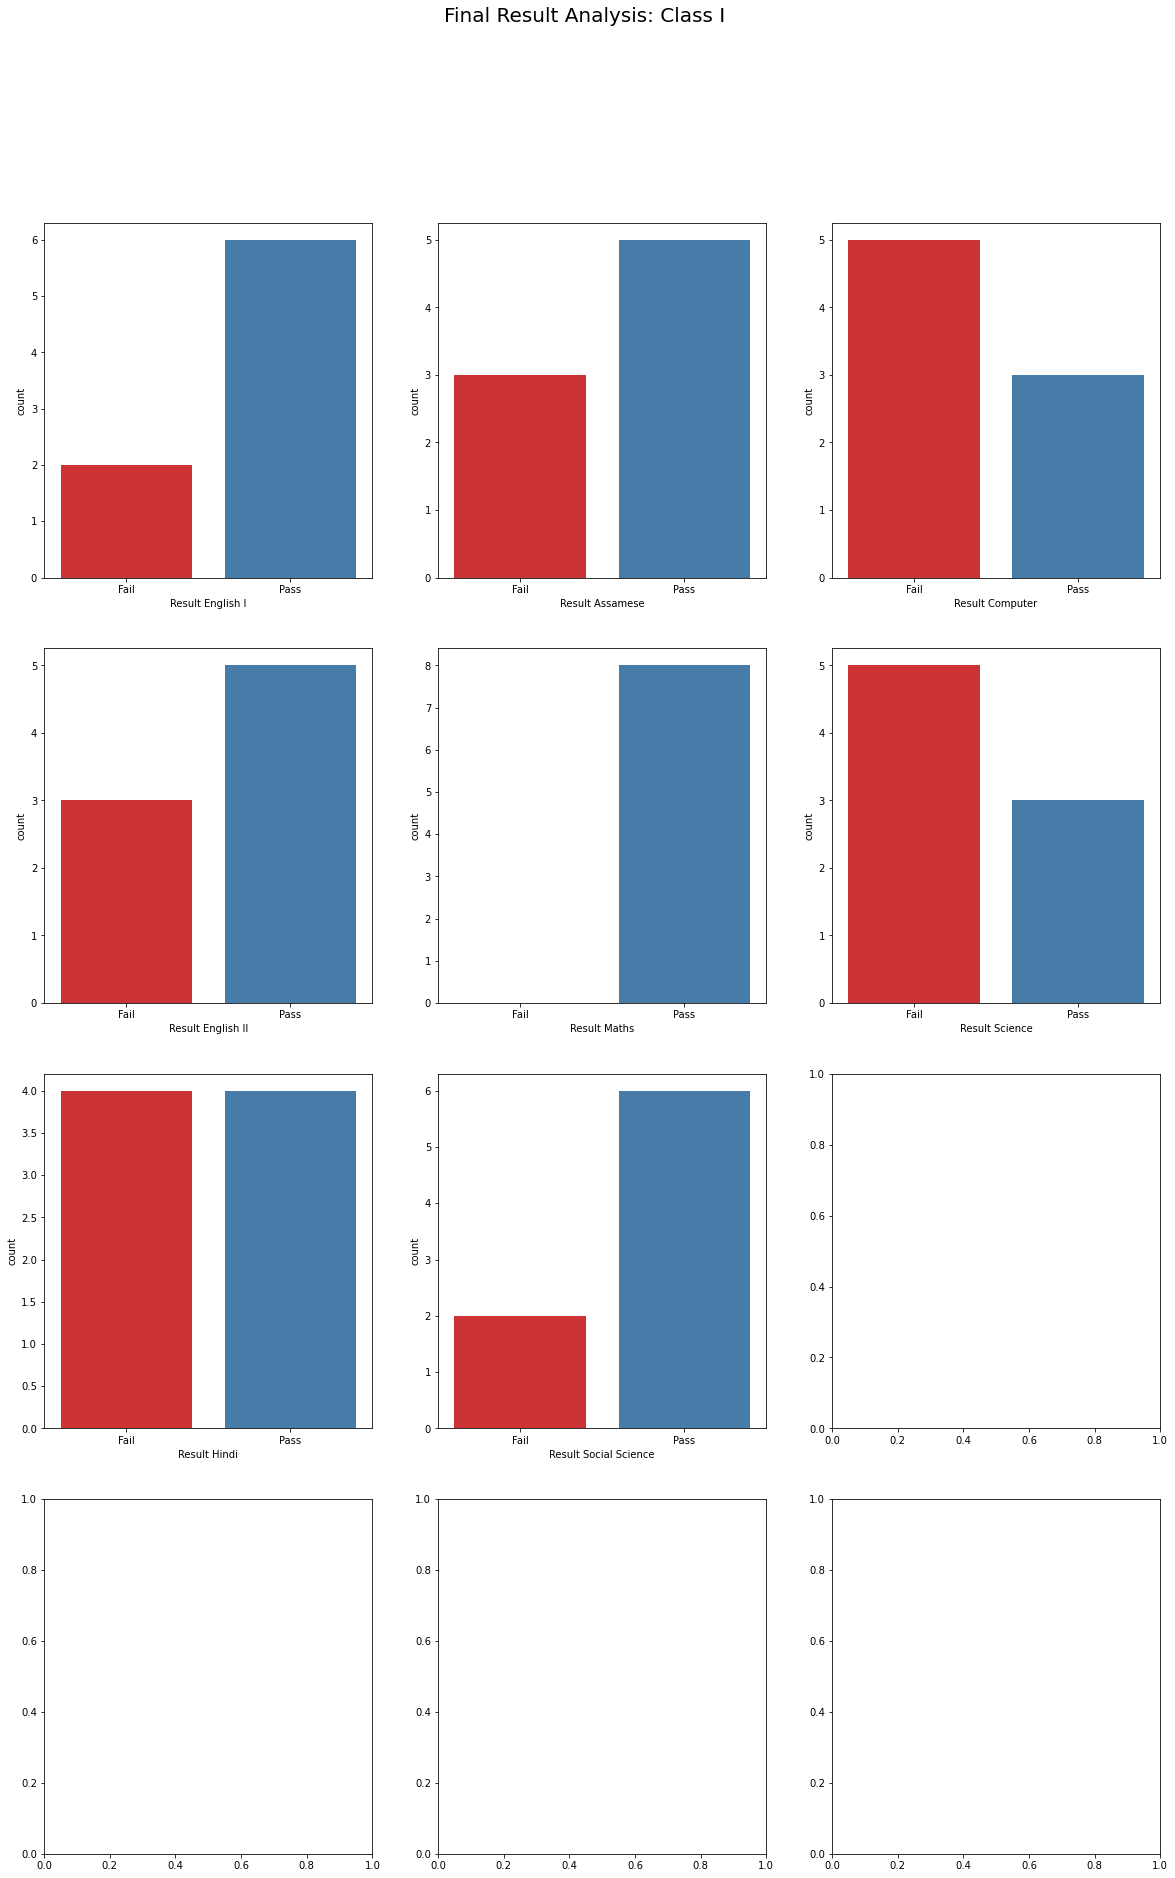

In [18]:
# Combine the charts in one figure
fig, axes = plt.subplots(4, 3, figsize=(20, 30));

# Set the title of the figure
fig.suptitle('Final Result Analysis: Class I', fontsize=20);

for i, subject in enumerate(subjects):
    sns.countplot(x='Result ' + subject, data=df_new, palette='Set1', order=['Fail', 'Pass'], ax=axes[i // 3, i % 3]);
plt.show();